In [ ]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
trainset = h5py.File("../data/train.h5", "r")
validateset = h5py.File("../data/val.h5", "r")
testset = h5py.File("../data/test.h5", "r")

train_images = trainset["images"][:] / 10000
validate_images = validateset["images"][:] / 10000
test_images = testset["images"][:] / 10000


bands = ["B01", "B02", "B03", "B04", "B05", "B06", "B07", "B08", "B8A", "B09", "B11", "B12"]

In [ ]:
for feature in trainset:
    print(f"{feature}:\t{trainset[feature][:].shape}")

agbd:	(25036,)
cloud:	(25036, 15, 15, 1)
images:	(25036, 15, 15, 12)
lat:	(25036, 15, 15, 1)
lon:	(25036, 15, 15, 1)
scl:	(25036, 15, 15, 1)


# Visualisations

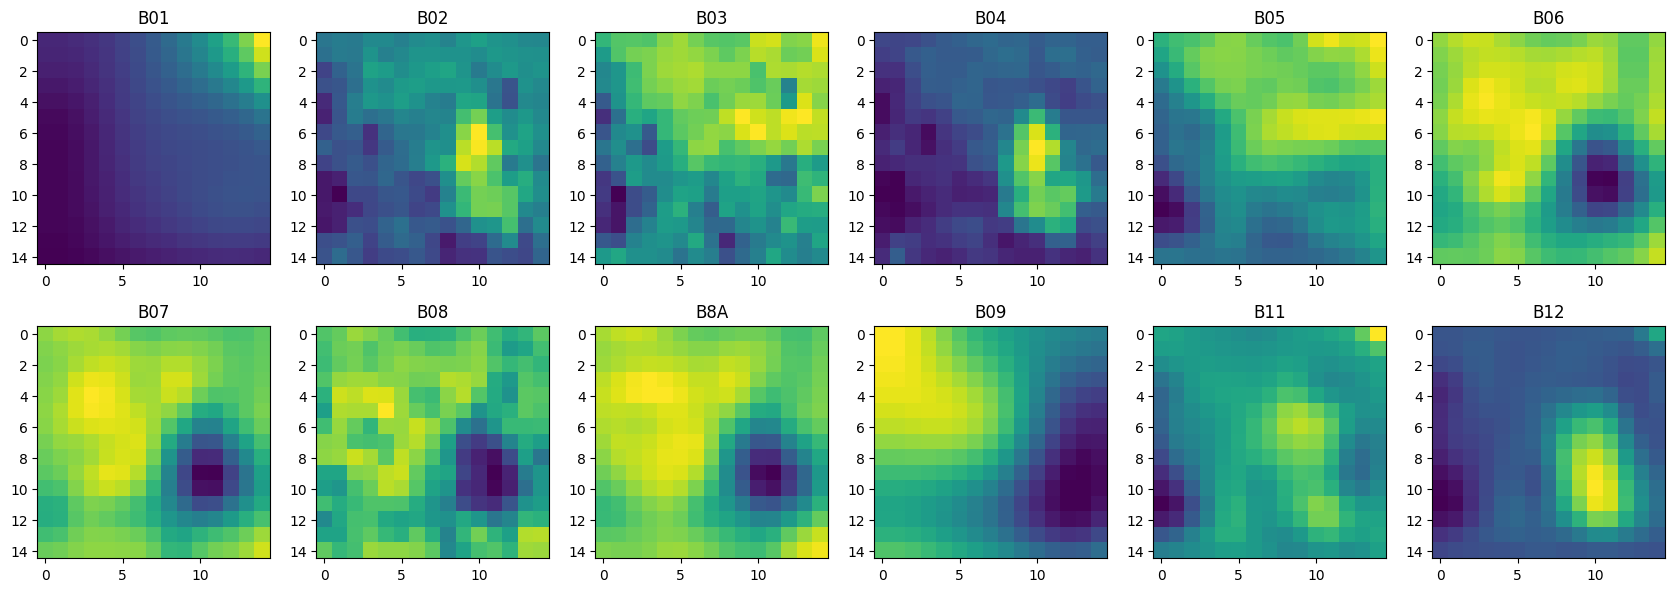

In [ ]:
def display_channels_of_img(num):
    fig, axs = plt.subplots(2, 6, figsize=(21,7))
    for row in range(axs.shape[0]):
        for ax in range(axs.shape[1]):
            band = row*axs.shape[1] + ax
            axs[row, ax].set_title(bands[band])
            axs[row, ax].imshow(train_images[num, :, : , band])

display_channels_of_img(0) # 0 - 25136

## Pearson correlation

In [ ]:
def pearson_corr(images):
    corr = np.zeros((images.shape[0], images.shape[0]))

    for i in range(len(images)):
        images[i] -= np.mean(images[i])

    for x in range(corr.shape[0]):
        for y in range(corr.shape[1]):
            corr[x,y] = (np.sum(images[x] * images[y])) /\
                        (np.sqrt(np.sum(np.square(images[x]))) * np.sqrt(np.sum(np.square(images[y]))))

    plt.imshow(corr, cmap="viridis")

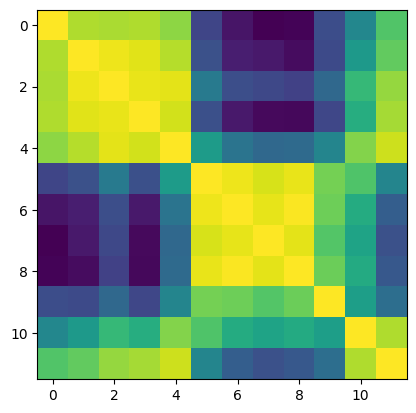

In [ ]:
pearson_corr(train_images.transpose(3,0,1,2))

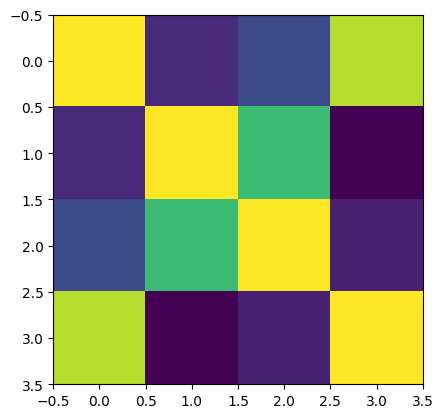

In [ ]:
pearson_corr(train_images.transpose(3,0,1,2)[[4,6,9,11]])

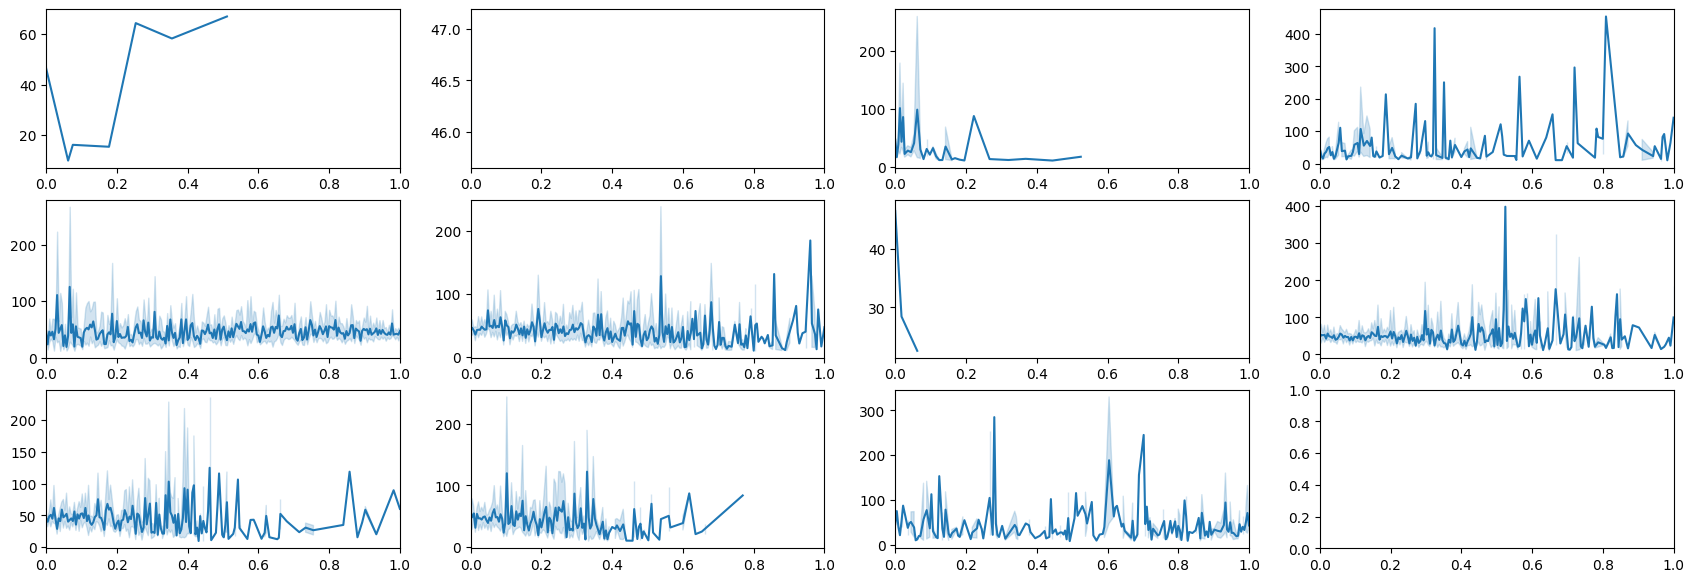

In [ ]:
scl = [(trainset['scl'][:] == i).mean((1,2)).squeeze() for i in range(11)]
agbd = trainset['agbd'][:].squeeze()

fig, axs = plt.subplots(3, 4, figsize=(21,7))
for i in range(11):
    ax=axs[i//4, i%4]
    sns.lineplot(x=scl[i],y=agbd, ax=ax, legend='full')
    ax.set_xlim(0,1)